- HSV ÏÉâÏÉÅÍ≥µÍ∞ÑÏùò Íµ¨ÏÑ±

 <img src="../myCode/openCV/lecture_image/hsv.png" width=70%>

- ÏÉâÏÉÅ Í∞í 
  - Hue Í∞íÏùÄ 0-179 Î≤îÏúÑÎ°ú ÏÑ§Ï†ï
  - ÎßåÏïΩ Hue Í∞íÏùÑ -Î°ú ÏÑ§Ï†ïÌïòÎ©¥ Îí§Ï™ΩÎ∂ÄÌÑ∞ Ïù∏Îç±Ïã±Îê®

<img src="../myCode/openCV/lecture_image/hsv2.png" width=50%>

<table style="border-collapse: collapse; width: 100%; height: 140px;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr style="height: 20px;">
<td style="width: 13.6047%; text-align: center; height: 20px;"><b>Î™ÖÏπ≠</b></td>
<td style="width: 11.5115%; text-align: center; height: 20px;"><b>Í∞íÏùò Î≤îÏúÑ</b></td>
<td style="width: 49.8837%; text-align: center; height: 20px;"><b>Ï∞∏Í≥†</b></td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>ÏÉâÏÉÅ(H)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 180</td>
<td style="width: 49.8837%; height: 40px;">ÏõêÎûò 0~360Î≤îÏúÑÏù¥ÏßÄÎßå OpenCVÏóêÏÑúÎäî 1/2 Î≤îÏúÑÏù¥Îã§</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>Ï±ÑÎèÑ(S)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">Í∞íÏù¥ 0Ïóê Í∞ÄÍπåÏö∞Î©¥ ÌïòÏñÄÏÉâ, 255Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù HÏùò ÏÉâÏÉÅÏù¥ ÎêúÎã§.</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>Î™ÖÎèÑ(V)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">Í∞íÏù¥ 0Ïóê Í∞ÄÍπåÏö∞Î©¥ Í≤ÄÏùÄÏÉâ, 255Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù &nbsp;HÏùò ÏÉâÏÉÅÏù¥ ÎêúÎã§.</td>
</tr>
</tbody>

# Ï§ëÏã¨Ï†ê Í≤ÄÏ∂ú

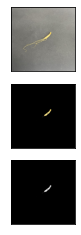

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../myCode/openCV/image/insam.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.subplot(3,1,1)
plt.xticks([]); plt.yticks([])
plt.imshow(img)

# ÏÉâÏÉÅ, Ï±ÑÎèÑ, Î™ÖÎèÑ Ïàú
lower = np.array([20, 100,200])
higher = np.array([30, 255, 255])
mask = cv2.inRange(hsv, lower, higher)
img_hsv = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(3,1,2)
plt.xticks([]); plt.yticks([])
plt.imshow(img_hsv)

plt.subplot(3,1,3)
img_gray = cv2.cvtColor(img_hsv, cv2.COLOR_RGB2GRAY)
plt.xticks([]); plt.yticks([])
plt.imshow(img_gray,cmap='gray')

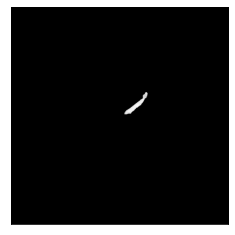

In [19]:
#Ïπ®Ïãù
kernel = np.ones((3,3), np.uint8)
# interations : ÏàòÌñâ ÌöüÏàò (ÌÅ¥ÏàòÎ°ù Í∏ÄÏî®Îì§Ïù¥ ÏñáÏïÑÏßê)
img_gray = cv2.erode(img_gray, kernel, iterations=1)

#ÌåΩÏ∞Ω (ÎßàÏä§ÌÅ¨ ÌÅ¨Í≤å ÎßåÎì§ Ïàò ÏûàÏùå, ÎßàÏä§ÌÅ¨ ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞ Í∞ÄÎä•)
kernel = np.ones((3,3), np.uint8)
# deilate : ÏàòÌñâ ÌöüÏàò (ÌÅ¥ÏàòÎ°ù Í∏ÄÏî®Îì§Ïù¥ ÎëêÍ∫ºÏõåÏßê)
img_gray = cv2.dilate(img_gray, kernel, iterations=3)
img_gray = cv2.erode(img_gray, kernel, iterations=3)
plt.xticks([]); plt.yticks([])
plt.imshow(img_gray, cmap='gray')

In [20]:
obj=[]

for x in range(640):
    y = 0
    i = img_gray[x]  
    for j in i:
        if j > 0:
            obj.append([x,y,j])
        y += 1
        
yy = 0
for i in range(len(obj)):
    yy += obj[i][0]
    print(yy)
yy = yy // len(obj)

xx = 0
for i in range(len(obj)):
    xx += obj[i][1]
xx = xx // len(obj)

print(f'({xx},{yy})')

253
506
759
1012
1266
1520
1774
2028
2282
2536
2791
3046
3301
3556
3811
4066
4321
4577
4833
5089
5345
5601
5857
6113
6369
6626
6883
7140
7397
7654
7911
8168
8425
8683
8941
9199
9457
9715
9973
10231
10489
10747
11006
11265
11524
11783
12042
12301
12560
12819
13078
13337
13596
13856
14116
14376
14636
14896
15156
15416
15676
15936
16196
16456
16717
16978
17239
17500
17761
18022
18283
18544
18805
19066
19327
19588
19850
20112
20374
20636
20898
21160
21422
21684
21946
22208
22470
22732
22994
23257
23520
23783
24046
24309
24572
24835
25098
25361
25624
25887
26150
26413
26677
26941
27205
27469
27733
27997
28261
28525
28789
29053
29317
29581
29845
30110
30375
30640
30905
31170
31435
31700
31965
32230
32495
32760
33025
33291
33557
33823
34089
34355
34621
34887
35153
35419
35685
35951
36218
36485
36752
37019
37286
37553
37820
38087
38354
38621
38888
39156
39424
39692
39960
40228
40496
40764
41032
41300
41568
41836
42105
42374
42643
42912
43181
43450
43719
43988
44257
44526
44796
45066
45336
4560

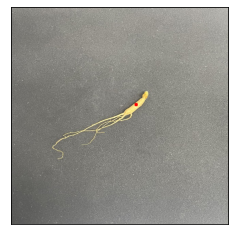

In [10]:
img_to_point = cv2.circle(img, (xx, yy),5,(255,0,0), -1)
plt.xticks([]); plt.yticks([])
plt.imshow(img_to_point)

In [14]:
obj

[[253, 395, 197],
 [253, 396, 205],
 [253, 397, 205],
 [253, 398, 212],
 [254, 394, 188],
 [254, 395, 197],
 [254, 396, 205],
 [254, 397, 205],
 [254, 398, 212],
 [254, 399, 211],
 [255, 393, 186],
 [255, 394, 188],
 [255, 395, 200],
 [255, 396, 205],
 [255, 397, 205],
 [255, 398, 212],
 [255, 399, 211],
 [256, 393, 186],
 [256, 394, 188],
 [256, 395, 212],
 [256, 396, 212],
 [256, 397, 213],
 [256, 398, 212],
 [256, 399, 211],
 [256, 400, 211],
 [257, 393, 186],
 [257, 394, 204],
 [257, 395, 204],
 [257, 396, 204],
 [257, 397, 217],
 [257, 398, 212],
 [257, 399, 211],
 [257, 400, 211],
 [258, 392, 162],
 [258, 393, 186],
 [258, 394, 196],
 [258, 395, 199],
 [258, 396, 204],
 [258, 397, 211],
 [258, 398, 212],
 [258, 399, 211],
 [258, 400, 207],
 [259, 390, 189],
 [259, 391, 189],
 [259, 392, 189],
 [259, 393, 189],
 [259, 394, 196],
 [259, 395, 199],
 [259, 396, 204],
 [259, 397, 204],
 [259, 398, 204],
 [259, 399, 204],
 [259, 400, 207],
 [260, 389, 192],
 [260, 390, 192],
 [260, 391

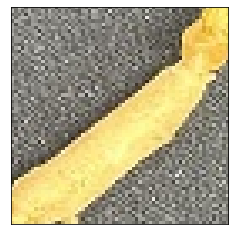

In [23]:
img_resize = img[253:318,335:400]
plt.xticks([]); plt.yticks([])
plt.imshow(img_resize)

In [24]:
img_resize.shape

(65, 65, 3)

## ROIÏóê ÎèÑÌòï Í∑∏Î¶¨Í∏∞

- <font color=red>cv2.line(Î∞∞Í≤ΩÏù¥ÎØ∏ÏßÄ, ÏãúÏûëÏ†êÏ¢åÌëú, ÎÅùÏ†êÏ¢åÌëú, ÏÉâÏÉÅ, ÏÑ†ÎëêÍªò)</font> : ÏßÅÏÑ† Í∑∏Î¶¨Í∏∞

<img src="../myCode/openCV/lecture_image/06_line.png" width=40%>  

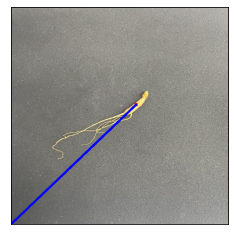

In [11]:
line_img = cv2.line(img, (0, 640),(xx, yy),(0,0,255), 5)
plt.xticks([]); plt.yticks([])
plt.imshow(line_img)

# ÏõêÍ≤ÄÏ∂ú

- <font color=red>cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, minDis, param1, param2, minRadius, maxRadius)</font>
  - cv2.HOUGH_GRADIENT : ÏõêÏùÑ Ï∞æÎäî Î∞©Î≤ï
  - 1 : ÏõêÏù¥ÎØ∏ÏßÄÏôÄ ÌóàÌîÑÎ≥ÄÌôò Ïù¥ÎØ∏ÏßÄ Í∞ÑÏùòÎπÑÏú® (1Î°ú ÏÑ§Ï†ï)
  - minDist : Ïõê Ï§ëÏã¨Îì§ Í∞ÑÏùò ÏµúÏÜå Í±∞Î¶¨ (0Î≥¥Îã§ Ïª§Ïïº Ìï®)
  - param1 : Canny ÏóêÏßÄ Ï∂îÏ∂úÏûêÏùò maxVal Í∞í
  - parma2 : ÌóàÌîÑÎ≥ÄÌôò Ïπ¥Ïö¥ÌåÖ Í∞í (ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ ÏõêÌïòÏßÄ ÏïäÎäî ÎßéÏùÄ ÏõêÎì§Ïù¥ Í≤ÄÏ∂úÎê®)
  - minRadius : ÏõêÏùò ÏµúÏÜå Î∞òÏßÄÎ¶Ñ
  - maxRadius : ÏõêÏùò ÏµúÎåÄ Î∞òÏßÄÎ¶Ñ
  
  
- ÏõêÎ¶¨
  - Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏóêÏßÄÎ•º Í≥ÑÏÇ∞
  - ÏóêÏßÄÏóê Î≤ïÏÑ†ÏùÑ Í∏ãÍ≥† (Í∏∞Ïö∏Í∏∞) ÏßÅÍ∞ÅÏù∏ ÏÑ†ÏùÑ Í∑∏Î¶º  , Î≤ïÏÑ†:?
    - ÏÑ§Ï†ïÌïú Î∞òÏßÄÎ¶ÑÏùò Î≤îÏúÑÏóê Îî∞Îùº Ïó¨Îü¨ Í∞úÏùò ÏÑ†ÏùÑ Í∑∏Î¶º
  - Í∞ÄÏû• ÏÑ†Ïù¥ ÎßéÏù¥ ÎßåÎÇòÎäî Ï†êÏóê Ìï¥ÎãπÌïòÎäî Î∞òÏßÄÎ¶Ñ ÌÅ¨Í∏∞Ïùò ÏõêÏùÑ Ï∞æÏùå  
  
<img src="../myCode/openCV/lecture_image/12_hough03.png" width=30%>  

In [ ]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

img = cv2.imread('./image/insam3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Ïõê Ï∞æÍ∏∞
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, dp=1,
                           minDist=10, param1=60, param2=95,
                           minRadius=10, maxRadius=100)

# Ï§ëÏã¨Ï†ê Ï¢åÌëúÏôÄ Î∞òÏßÄÎ¶ÑÏùÑ Î∞òÌôò
print(circles)

if circles is not None:
    # Ï¢åÌëúÎäî Ï†ïÏàòÍ∞íÏù¥ÎØÄÎ°ú Ïã§ÏàòÎ•º Ï†ïÏàòÎ°ú Î≥ÄÌôòÌï¥Ï£ºÎäî ÏûëÏóÖ
    circles =np.uint16(np.around(circles))  # arounddÎäî Î∞òÏò¨Î¶ºÌï¥Ï£ºÎäî Ìï®Ïàò

    # ÏõêÍ∑∏Î¶¨Í∏∞
    for i in circles[0,:]:
        cv2.circle(img, (i[0], i[1]), i[2], (0,0,255), 4)
                   
    plt.imshow(img)
    plt.axis("off")

# ÏßÅÏÑ† Í≤ÄÏ∂ú

- <font color=red>cv2.HoughLines(image, rho, theta, threshold)</font>
  - image : single-channel binary image, canny edgeÎ•º Ï†ÅÏö©Ìïú Ïù¥ÎØ∏ÏßÄ
  - rho : r Í∞íÏùò Î≤îÏúÑ (0 ~ 1 Ïã§Ïàò)
  - theta : ùúÉ Í∞íÏùò Î≤îÏúÑ(0 ~ 180 Ï†ïÏàò)
  - threshold : ÎßåÎÇòÎäî Ï†êÏùò Í∏∞Ï§Ä, Ïà´ÏûêÍ∞Ä ÏûëÏúºÎ©¥ ÎßéÏùÄ ÏÑ†Ïù¥ Í≤ÄÏ∂úÎêòÏßÄÎßå Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥ÏßÄÍ≥† Ïà´ÏûêÍ∞Ä ÌÅ¨Î©¥ Ï†ïÌôïÎèÑÍ∞Ä Ïò¨ÎùºÍ∞ê

In [ ]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

img = cv2.imread('./image/conv2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# ÏóêÏßÄÎ•º Í≤ÄÏ∂úÌïòÍ≥† ÏóêÏßÄ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÑ†ÏùÑ Í≤ÄÏ∂ú
dst = cv2.Canny(img_gray, 150, 200)

plt.imshow(dst)

# # ÏÑ† Í≤ÄÏ∂ú
# lines = cv2.HoughLines(dst, 1, np.pi/180, 100)  #200ÏµúÏÜå 200Í∞úÍ∞Ä Í≤πÏ≥êÏïº ÏÑ†ÏúºÎ°ú Ïù∏Ï†ïÌïòÍ≤†Îã§?

# # Í≤ÄÏ∂úÎêú ÏÑ†ÏùÑ Í∑∏Î¶∞Îã§
# if lines is not None: #ÏÑ†ÏùÑ Ï∞æÏïòÎã§Î©¥
#     # Í≤ÄÏÉâÎêú ÏÑ†Ïùò Ïàò ÎßåÌÅº Î∞òÎ≥µ
#     for i in range(0, len(lines)):
#         # Í∞ÅÎèÑÏôÄ Í∏∏Ïù¥Î•º Í∞ÄÏ†∏Ïò®Îã§
#         # [0][0] : Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Í∞ÅÎèÑÏôÄ Í∏∏Ïù¥Î•º Í∞ÄÏ†∏Ïò®Îã§.
#         rho = lines[i][0][0] 
#         theta = lines[i][0][1]
        
#         # ÏãúÏûëÏ†ëÍ≥º ÎÅùÏ†êÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ÏÑú x,yÏ∂ïÏùò ÏÇºÍ∞ÅÎπÑÎ•º Í≥ÑÏÇ∞
#         tx = math.cos(theta)
#         ty = math.sin(theta)
        
#         # Îã®ÏúÑ Ï¢åÌëú Ï∂úÎ†•
#         x0 = rho * tx
#         y0 = rho * ty

#         # Í∏∞Ï§ÄÏ¢åÌëúÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÏÑ†Ïùò ÏãúÏûëÏ†êÍ≥º ÎÅùÏ†êÏùÑ Í≥ÑÏÇ∞
#         d = 1500  #Ï∂©Î∂ÑÏãú ÏÑ†ÏùÑ Í∏∏Í≤å ÌëúÏãúÌïòÍ∏∞ ÏúÑÌïú Í∞í (ÏûÑÏùò Í∞í)
#         x1 = int(x0 + d*(-ty))
#         y1 = int(y0 + d*(tx))
#         x2 = int(x0 - d*(-ty))
#         y2 = int(y0 - d*(tx))
        
#         cv2.line(img, (x1, y1), (x2, y2), (0,0,255), 30, cv2.LINE_AA)
        
# plt.imshow(img)
# plt.axis("off")
        

# ÎèôÏòÅÏÉÅ Í∞ùÏ≤¥ Ï∂îÏ†Å

- <font color=red>ret, win = cv2.CamShift(probImage, window, criteria)</font>
  - probImage: Í¥ÄÏã¨ Í∞ùÏ≤¥Ïóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû® Ïó≠Ìà¨ÏòÅ ÏòÅÏÉÅ (ÌôïÎ•† ÏòÅÏÉÅ)
  - window: Ï¥àÍ∏∞ Í≤ÄÏÉâ ÏòÅÏó≠ ÏúàÎèÑÏö∞ & Í≤∞Í≥º ÏòÅÏó≠ Î∞òÌôò
  - criteria: ÏïåÍ≥†Î¶¨Ï¶ò Ï¢ÖÎ£å Í∏∞Ï§Ä (type, maxCount, epsilon)
   - cv2.TERM_CRITERIA_EPS : Ï£ºÏñ¥ÏßÑ Ï†ïÌôïÎèÑ (Ïù¥Îèô ÌÅ¨Í∏∞)Ïóê ÎèÑÎã¨ÌïòÎ©¥ Î∞òÎ≥µ Ï§ëÎã®
   - cv2.TERM_CRITERIA_COUNT : Î∞òÎ≥µ ÌöüÏàòÏóê ÎèÑÎã¨ÌïòÎ©¥ Î∞òÎ≥µ Ï§ëÎã®
   - (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1) ‚ûî ÏµúÎåÄ 10Î≤à Î∞òÎ≥µÌïòÎ©∞, Ï†ïÌôïÎèÑÍ∞Ä 1Ïù¥ÌïòÏù¥Î©¥ (Ï¶â, Ïù¥Îèô ÌÅ¨Í∏∞Í∞Ä 1ÌîΩÏÖÄÎ≥¥Îã§ ÏûëÏúºÎ©¥) Ï¢ÖÎ£å.
    
  - ret : ÌöåÏ†ÑÎêú ÏÇ¨Í∞ÅÌòï Ï†ïÎ≥¥Î•º Î∞òÌôò - (x, y, width, height)
  - win : ÌöåÏ†ÑÏù¥ ÏïàÎêú ÏÇ¨Í∞ÅÌòï Ï†ïÎ≥¥Î•º Î∞òÌôò 

In [ ]:
#ÎÇ¥Í∫º
import cv2
cap = cv2.VideoCapture("C:/Users/AI\myCode/openCV/image/car.mp4")

init = 0 # Ï¥àÍ∏∞ÏúÑÏπò ÏÑ§Ï†ï Ïú†Î¨¥

# Ï¢ÖÎ£å Ï°∞Í±¥
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)


while cap.isOpened():  #ÏòÅÏÉÅÏù¥ Ïó¥Î†§ ÏûàÏùÑ ÎïåÎßå Î∞òÎ≥µÎ¨∏ ÎèåÏïÑÍ∞ê
    ret, frame = cap.read()
    
    if not ret:
        break
        
    img_draw = frame.copy()
    
    # ÎßåÏïΩ Ï¥àÍ∏∞ ÏãúÏûë ÏúÑÏπòÎ•º ÏÑ§Ï†ïÌïòÏßÄ ÏïäÏïòÎã§Î©¥
    if init == 0:
        #ÌÖçÏä§Ìä∏ Ï∂úÎ†•
        cv2.putText(img_draw, "Press set ROI", (10,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,255), 2, cv2.LINE_AA)
        
    else: 
        frame_hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
        
        #Ìà¨ÏòÅ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
        backproj = cv2.calcBackProject([frame_hsv], [0,1], hist,
                                       [0, 179, 0, 255], 1)
        
        #CamshiftÎ•º Ïù¥Ïö©Ìï¥ÏÑú Ï∂îÏ†Å
        ret2, rc = cv2.CamShift(backproj, rc, term_crit)
        #Ï∂îÏ†ÅÎêú ÏúÑÏπò ÌëúÏãú
        cv2.rectangle(img_draw, (rc[0], rc[1]), (rc[0]+rc[2], rc[1]+rc[3]), (0, 0, 255), 2)
        
        
    cv2.imshow("Tracking", img_draw)

    key = cv2.waitKey(33)
    
    # Ïä§ÌéòÏù¥Ïä§ Î∞îÎ•º ÎàÑÎ•∏ Í≤ΩÏö∞, ÏïÑÏßÅ Ï¥àÍ∏∞ ÏúÑÏπòÎ•º ÏßÄÏ†ïÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞
    if key == ord(' ') and init == 0:  
        # ÎßàÏö∞Ïä§Î°ú Ï∂îÏ†ÅÌï† ÏúÑÏπòÎ•º ÏßÄÏ†ï
        x, y, w, h = cv2.selectROI("Tracking", frame, False)

        # Ï¥àÍ∏∞ ÏúÑÏπòÎ•º ÎßàÏö∞Ïä§Î°ú ÏÑ†ÌÉùÌñàÎã§Î©¥
        if w and h :
            rc = (x, y, w, h)


            #ÏÑ†ÌÉùÌïú ÏòÅÏó≠ÏùÑ HSVÎ°ú Î≥ÄÌôò
            roi = frame[y:y+h, x:x+w] # Ìï¥ÎãπÏù¥ÎØ∏ÏßÄÎßåÌÅº ÏûêÎ•¥Í∏∞
            roi_hsv = cv2.cvtColor(roi, cv2.COLOR_RGB2HSV)

            hist = cv2.calcHist([roi_hsv], [0,1], None,
                                [90, 128], [0, 180, 0, 256])

            # ÎÖ∏ÎßêÎùºÏù¥Ï†Ä ÏãúÏ†ÑÏùÄ Ìï¥Îãπ Í∞íÎì§ÏùÑ ÏµúÏÜå Í∞íÏùÑ 0ÏúºÎ°ú ÏµúÎåÄÍ∞íÏùÑ 1Î°úÌï¥ÏÑú Ï†ïÍ∑úÌôî ÏãúÌÇ§Îäî Í≤É (Ïó≠Ìà¨ÏòÅ)
            cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)
            init = 1
    elif key == 49:
        break

cap.release()
cv2.destroyAllWindows()


# ÏõπÏ∫† Ïó∞Í≤∞

In [5]:
# ÏúÑÏ†ØÏù¥Ïö©ÌïòÏó¨ ÏòÅÏÉÅ Ï∂úÎ†• 
import ipywidgets as widget
from IPython.display import display
import cv2

img_widget = widget.Image(format=".jpeg", width=480, height=480)
display(img_widget)

cap = cv2.VideoCapture(1)

while True: 
    ret, frame = cap.read()    
    if not ret:
        cap.release #ÎπÑÎîîÏò§ Í≤©Î¶¨Ìï¥Ï†ú ÏïàÌïòÎ©¥ Îã§Ïãú Ïû¨ÏÉù ÏïàÎê®
        break
        
    try:
        cv2.waitKey(33)
        _, en_img = cv2.imencode(".jpeg", frame)
    except KeyboardInterrupt :
        cap.release()
        break

    img_widget.value = en_img.tobytes() #Î∞îÏù¥Ìä∏ Îã®ÏúÑÎ°ú Î∞îÍøîÏÑú Ï†ÑÏÜ°Ìï¥Ï£ºÍ∏∞ ÏúÑÌï®


Image(value=b'', format='.jpeg', height='480', width='480')

In [4]:
import cv2

try:
    cap = cv2.VideoCapture(1)
    print("ÏõπÏ∫† Ïó∞Í≤∞ ÏÑ±Í≥µ")
    # Ï∫°Ï≥êÌïú ÎπÑÎîîÏò§Î°úÎ∂ÄÌÑ∞ ÌîÑÎ†àÏûÑÏù¥ÎØ∏ÏßÄÎ•º ÏùΩÎäîÎã§.
    while True:
        # ret(ÏÑ±Í≥µÏó¨Î∂ÄT/F),frame:ÏùΩÏùÄ Ïù¥ÎØ∏ÏßÄ Î∞òÌôò 
        ret, frame = cap.read()    

        if not ret: #Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏßÄ Î™ªÌñàÎã§Î©¥
            cap.release() #ÎπÑÎîîÏò§ Í∞ùÏ≤¥ Î©îÎ™®Î¶¨ÏóêÏÑú Ìï¥Ï†ú
            cv2.destroyAllWindows() #Ï∞ΩÎã´Í∏∞
            break
        
        ############### Ïù¥ÎØ∏ÏßÄ ÏàòÏ†ï ÏΩîÎìú ÏûëÏÑ± Í≥µÍ∞Ñ ###############
#         hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
#         lower = np.array([20, 100,200])
#         higher = np.array([30, 255, 255])
#         mask = cv2.inRange(hsv, lower, higher)
#         img_hsv = cv2.bitwise_and(frame, frame, mask=mask)
        img_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
#         #Ïπ®Ïãù
#         kernel = np.ones((3,3), np.uint8)
#         # interations : ÏàòÌñâ ÌöüÏàò (ÌÅ¥ÏàòÎ°ù Í∏ÄÏî®Îì§Ïù¥ ÏñáÏïÑÏßê)
#         img_gray = cv2.erode(img_gray, kernel, iterations=1)
#         #ÌåΩÏ∞Ω (ÎßàÏä§ÌÅ¨ ÌÅ¨Í≤å ÎßåÎì§ Ïàò ÏûàÏùå, ÎßàÏä§ÌÅ¨ ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞ Í∞ÄÎä•)
#         kernel = np.ones((3,3), np.uint8)
#         # deilate : ÏàòÌñâ ÌöüÏàò (ÌÅ¥ÏàòÎ°ù Í∏ÄÏî®Îì§Ïù¥ ÎëêÍ∫ºÏõåÏßê)
#         img_gray = cv2.dilate(img_gray, kernel, iterations=3)
#         img_gray = cv2.erode(img_gray, kernel, iterations=3)
        ##########################################################
        
        cv2.imshow("video", img_gray)

        key=cv2.waitKey(66)  # Ïù¥ Ïà´Ïûê Ï§ÑÏù¥Î©¥ Îπ®Î¶¨Í∞ê 33ÏùÄ 1000/33 Ìï¥ÏÑú 1Ï¥àÏóê 30ÌîÑÎ†àÏûÑ ÎÇòÏò§Í≤å ÌïòÎäî Í≤É Ïà´Ïûê Ï§ÑÏù¥Î©¥ 1Ï¥àÏóê ÎçîÎßéÏùÄ ÌîÑÎ†àÏûÑ ÎèåÎ¶º

        if key ==49 : #Ïà´Ïûê1ÏùÑ ÎàÑÎ•¥Î©¥
            cap.release() #ÎπÑÎîîÏò§ Í∞ùÏ≤¥ Î©îÎ™®Î¶¨ÏóêÏÑú Ìï¥Ï†ú
            cv2.destroyAllWindows() #Ï∞ΩÎã´Í∏∞
            break
except:
    print("ÏõπÏ∫† Ïó∞Í≤∞ Ïã§Ìå®")

ÏõπÏ∫† Ïó∞Í≤∞ ÏÑ±Í≥µ
